In [1]:
%matplotlib inline


# Wasserstein Discriminant Analysis


This example illustrate the use of WDA as proposed in [11].


[11] Flamary, R., Cuturi, M., Courty, N., & Rakotomamonjy, A. (2016).
Wasserstein Discriminant Analysis.




In [2]:
# Author: Remi Flamary <remi.flamary@unice.fr>
#
# License: MIT License

import numpy as np
import matplotlib.pylab as pl

from ot.dr import wda, fda

Generate data
-------------



In [3]:
#%% parameters

n = 1000  # nb samples in source and target datasets
nz = 0.2

# generate circle dataset
t = np.random.rand(n) * 2 * np.pi
ys = np.floor((np.arange(n) * 1.0 / n * 3)) + 1
xs = np.concatenate(
    (np.cos(t).reshape((-1, 1)), np.sin(t).reshape((-1, 1))), 1)
xs = xs * ys.reshape(-1, 1) + nz * np.random.randn(n, 2)

t = np.random.rand(n) * 2 * np.pi
yt = np.floor((np.arange(n) * 1.0 / n * 3)) + 1
xt = np.concatenate(
    (np.cos(t).reshape((-1, 1)), np.sin(t).reshape((-1, 1))), 1)
xt = xt * yt.reshape(-1, 1) + nz * np.random.randn(n, 2)

nbnoise = 8

xs = np.hstack((xs, np.random.randn(n, nbnoise)))
xt = np.hstack((xt, np.random.randn(n, nbnoise)))

Plot data
---------



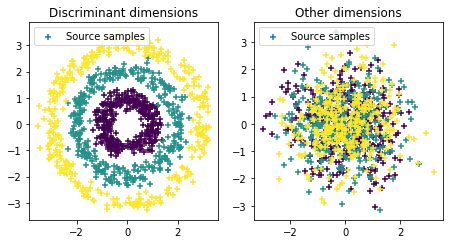

In [4]:
#%% plot samples
pl.figure(1, figsize=(6.4, 3.5))

pl.subplot(1, 2, 1)
pl.scatter(xt[:, 0], xt[:, 1], c=ys, marker='+', label='Source samples')
pl.legend(loc=0)
pl.title('Discriminant dimensions')

pl.subplot(1, 2, 2)
pl.scatter(xt[:, 2], xt[:, 3], c=ys, marker='+', label='Source samples')
pl.legend(loc=0)
pl.title('Other dimensions')
pl.tight_layout()

Compute Fisher Discriminant Analysis
------------------------------------



In [5]:
#%% Compute FDA
p = 2

Pfda, projfda = fda(xs, ys, p)

Compute Wasserstein Discriminant Analysis
-----------------------------------------



In [6]:
#%% Compute WDA
p = 2
reg = 1e0
k = 10
maxiter = 100

Pwda, projwda = wda(xs, ys, p, reg, k, maxiter=maxiter)

Compiling cost function...
Computing gradient of cost function...
 iter		   cost val	    grad. norm
    1	+8.7135243329934142e-01	4.22283975e-01
    2	+4.5259877952239763e-01	2.80207825e-01
    3	+4.2301660192758839e-01	2.57544116e-01
    4	+3.6438385605814744e-01	2.01503900e-01
    5	+2.6854415219016237e-01	1.86872752e-01
    6	+2.3605613971887493e-01	8.54873065e-02
    7	+2.3238632608008850e-01	4.70510545e-02
    8	+2.3084542185757945e-01	8.60266814e-03
    9	+2.3083921287882422e-01	8.05123557e-03
   10	+2.3081791779181188e-01	5.75567680e-03
   11	+2.3081444006658824e-01	5.32065675e-03
   12	+2.3080311057315009e-01	3.34753227e-03
   13	+2.3079768318049571e-01	1.75615642e-03
   14	+2.3079588611065080e-01	6.04609566e-04
   15	+2.3079584350945395e-01	5.50079922e-04
   16	+2.3079571065356075e-01	3.07865387e-04
   17	+2.3079565041678046e-01	3.29364280e-05
   18	+2.3079564985490117e-01	1.32999543e-05
   19	+2.3079564975468964e-01	3.81768629e-06
   20	+2.3079564974709890e-01	1.50474730e-06


Plot 2D projections
-------------------



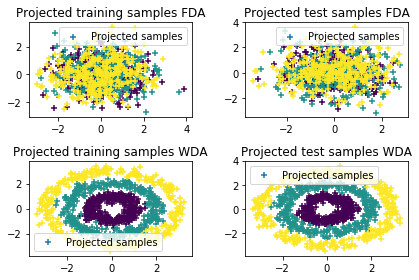

In [7]:
#%% plot samples

xsp = projfda(xs)
xtp = projfda(xt)

xspw = projwda(xs)
xtpw = projwda(xt)

pl.figure(2)

pl.subplot(2, 2, 1)
pl.scatter(xsp[:, 0], xsp[:, 1], c=ys, marker='+', label='Projected samples')
pl.legend(loc=0)
pl.title('Projected training samples FDA')

pl.subplot(2, 2, 2)
pl.scatter(xtp[:, 0], xtp[:, 1], c=ys, marker='+', label='Projected samples')
pl.legend(loc=0)
pl.title('Projected test samples FDA')

pl.subplot(2, 2, 3)
pl.scatter(xspw[:, 0], xspw[:, 1], c=ys, marker='+', label='Projected samples')
pl.legend(loc=0)
pl.title('Projected training samples WDA')

pl.subplot(2, 2, 4)
pl.scatter(xtpw[:, 0], xtpw[:, 1], c=ys, marker='+', label='Projected samples')
pl.legend(loc=0)
pl.title('Projected test samples WDA')
pl.tight_layout()

pl.show()